This notebook aims to measure the differences between the GFLOPS of matrix multiplication using standard for loops, numpy, and CUDA.

`GFLOPS = 2 * n^3 / time / 2 ^ 30`, where n = size of the matrix.

In [18]:
import time  
import numpy as np
import matplotlib.pyplot as plt
import cupy as cp
GIGA_CONST = 2**30

In [5]:
def multiply(A, B):
  """
  Computes the product of two matrices using for loops in O(n^3) time.
  Input: A - matrix of size nxn
         B - matrix of size nxn
  """
  n = len(A)
  # C = [[None for j in range(n)] for i in range(n)]

  for i in range(n):
    for j in range(n):
      curr_element = 0
      for k in range(n):
        curr_element += A[i][k] * B[k][j]
      # C[i][j] = curr_element

  # return C


In [28]:
def multiply_fast(A, B):
  """
  Computes the product of two matrices using numpy.
  Input: A - numpy.array of size nxn
         B - numpy.array of size nxn
  """
  np.matmul(A, B)

In [20]:
def multiply_cuda(A, B):
  """
  Computes the product of two matrices using cupy.
  Input: A - cupy.array of size nxn
         B - cupy.array of size nxn
  """
  cp.matmul(A, B)

In [7]:
matrix_sizes = [i for i in range(1, 151)]

In [23]:
def generate_gflops_list(mult_func, matrix_sizes, cuda = False):
  GFLOPS = []
  time_taken = []
  for i in matrix_sizes:
    A, B = np.random.rand(i, i), np.random.rand(i, i)
    if cuda:
      A, B = cp.random.rand(i, i), cp.random.rand(i, i)
    start = time.time()
    mult_func(A, B)
    end = time.time()
    time_ = end - start
    time_taken.append(time_)
    gflops = 2 * i**3 / time_ / GIGA_CONST
    GFLOPS.append(gflops)
  return GFLOPS, time_taken

In [58]:
GFLOPS_NAIVE, TIME_NAIVE = generate_gflops_list(multiply, matrix_sizes)

In [59]:
GFLOPS_NUMPY, TIME_NUMPY = generate_gflops_list(multiply_fast, matrix_sizes)

In [9]:
GFLOPS_NAIVE_GPU, TIME_NAIVE_GPU = generate_gflops_list(multiply, matrix_sizes)

In [11]:
GFLOPS_NUMPY_GPU, TIME_NUMPY_GPU = generate_gflops_list(multiply_fast, matrix_sizes)

In [24]:
GFLOPS_CUDA, TIME_CUDA = generate_gflops_list(multiply_cuda, matrix_sizes, cuda = True)

# Plotting the results

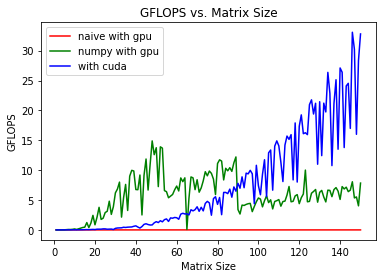

In [25]:
# plt.plot(matrix_sizes, GFLOPS_NAIVE, color = 'b', label = 'naive')
# plt.plot(matrix_sizes, GFLOPS_NUMPY, color = 'g', label = 'numpy')
plt.plot(matrix_sizes, GFLOPS_NAIVE_GPU, color = 'r', label = 'naive with gpu')
plt.plot(matrix_sizes, GFLOPS_NUMPY_GPU, color = 'g', label = 'numpy with gpu')
plt.plot(matrix_sizes, GFLOPS_CUDA, color = 'b', label = 'with cuda')
plt.xlabel('Matrix Size')
plt.ylabel('GFLOPS')
plt.title('GFLOPS vs. Matrix Size')
plt.legend()
plt.show()

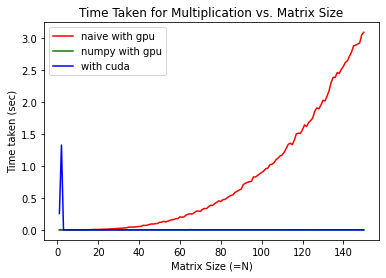

In [26]:
# plt.plot(matrix_sizes, TIME_NAIVE, color = 'b', label = 'naive')
# plt.plot(matrix_sizes, TIME_NUMPY, color = 'g', label = 'numpy')
plt.plot(matrix_sizes, TIME_NAIVE_GPU, color = 'r', label = 'naive with gpu')
plt.plot(matrix_sizes, TIME_NUMPY_GPU, color = 'g', label = 'numpy with gpu')
plt.plot(matrix_sizes, TIME_CUDA, color = 'b', label = 'with cuda')
plt.xlabel('Matrix Size (=N)')
plt.ylabel('Time taken (sec)')
plt.title('Time Taken for Multiplication vs. Matrix Size')
plt.legend()
plt.show()

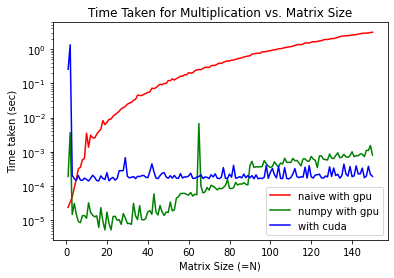

In [27]:
plt.yscale('log')
plt.plot(matrix_sizes, TIME_NAIVE_GPU, color = 'r', label = 'naive with gpu')
plt.plot(matrix_sizes, TIME_NUMPY_GPU, color = 'g', label = 'numpy with gpu')
plt.plot(matrix_sizes, TIME_CUDA, color = 'b', label = 'with cuda')
plt.xlabel('Matrix Size (=N)')
plt.ylabel('Time taken (sec)')
plt.title('Time Taken for Multiplication vs. Matrix Size')
plt.legend()
plt.show()